In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
import matplotlib.ticker as mtick

In [2]:
data = pd.read_pickle("df/offer_holder.pkl") 
pd.set_option('display.max_columns', 300) # allow us read the full picture of dataframe
print(list(data))

['Department', 'Applicant ID', 'City - Address line 4', 'Programme', 'Latest Decision', 'Latest Decision Date', 'Country of Birth', 'Domicile', 'Nationality', 'Country of Institution', 'Grade on application', 'uob_alum', 'home_oversea', 'master_prev', 'distance', 'Institution', 'Institution_app_num', 'Fee Status', 'School', 'A1 Created date', 'A1 Updated date', 'A2 Created date', 'Decision Date', 'Response Date', 'Days at Admissions Review', 'Days in School', 'Days at Decision Stage', 'Total Days Admissions', 'TOTAL Days', 'Response days', 'decision_since_Sep01', 'A1C_since_Sep01', 'A1U_since_Sep01', 'A2C_since_Sep01', 'Response_since_Sep01', 'funding', 'Decision_C', 'Decision_R', 'Decision_U', 'Status', 'Qual_Name', 'Ielts_Overall', 'Ielts_Listening', 'Ielts_Reading', 'Ielts_Writing', 'Ielts_Speaking', 'Toefl_Overall', 'Toefl_Listening', 'Toefl_Reading', 'Toefl_Writing', 'Toefl_Speaking', 'PTE_Overall', 'PTE_Listening', 'PTE_Reading', 'PTE_Writing', 'PTE_Speaking', 'eng_type', 'multi_

In [3]:
data = data.loc[:,['School', 'Applicant ID', 'Programme', 
                 'uob_alum', 'home_oversea', 'master_prev', 'distance', 'funding', 
                 'A1 Created date', 'A1 Updated date', 'A2 Created date', 'Decision Date', 'Response Date', 
                 'Days at Admissions Review', 'Days in School', 'Days at Decision Stage', 'Total Days Admissions', 'TOTAL Days', 'Response days', 
                 'decision_since_Sep01', 'A1C_since_Sep01', 'A1U_since_Sep01', 'A2C_since_Sep01', 'Response_since_Sep01',                  
                 'Decision_C', 'Decision_R', 'Decision_U', 
                 'eng_type', 'Ielts_Overall', 'Ielts_Listening', 'Ielts_Reading', 'Ielts_Writing', 'Ielts_Speaking', 
                 'Toefl_Overall', 'Toefl_Listening', 'Toefl_Reading', 'Toefl_Writing', 'Toefl_Speaking', 
                 'PTE_Overall', 'PTE_Listening', 'PTE_Reading', 'PTE_Writing', 'PTE_Speaking', 
                  'Institution_app_num',  'Institution_offer_num', 'Insti_weight',
                 'multi_app', 'offered', 'offer_num', 'accepted']]
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 15602
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   School                     8912 non-null   object        
 1   Applicant ID               8912 non-null   int64         
 2   Programme                  8912 non-null   object        
 3   uob_alum                   8912 non-null   int32         
 4   home_oversea               8912 non-null   int32         
 5   master_prev                8912 non-null   int64         
 6   distance                   8912 non-null   float64       
 7   funding                    8912 non-null   float64       
 8   A1 Created date            8912 non-null   datetime64[ns]
 9   A1 Updated date            8912 non-null   datetime64[ns]
 10  A2 Created date            8912 non-null   datetime64[ns]
 11  Decision Date              8912 non-null   datetime64[ns]
 12  Respo

In [4]:
print('Shape:', data.shape)
data.describe()

Shape: (8912, 50)


,Applicant ID,uob_alum,home_oversea,master_prev,distance,funding,Days at Admissions Review,Days in School,Days at Decision Stage,Total Days Admissions,TOTAL Days,Response days,decision_since_Sep01,A1C_since_Sep01,A1U_since_Sep01,A2C_since_Sep01,Response_since_Sep01,Decision_C,Decision_R,Decision_U,eng_type,Ielts_Overall,Ielts_Listening,Ielts_Reading,Ielts_Writing,Ielts_Speaking,Toefl_Overall,Toefl_Listening,Toefl_Reading,Toefl_Writing,Toefl_Speaking,PTE_Overall,PTE_Listening,PTE_Reading,PTE_Writing,PTE_Speaking,Institution_app_num,Institution_offer_num,Insti_weight,multi_app,offered,offer_num,accepted
count,8.912000e+03,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.0,8912.000000,8912.000000
mean,2.279385e+06,0.010099,0.924372,0.057787,7445.119011,0.033214,45.436715,9.665732,13.824731,59.261445,68.927177,11.772554,203.057002,123.579556,168.993492,115.432002,109.224753,0.953770,0.007855,0.038375,0.484066,2.340103,2.243380,2.227671,1.970209,2.001964,4.637141,1.231373,1.267168,1.143851,1.086681,0.175774,0.180206,0.180655,0.188510,0.192213,16.996858,11.335503,0.741623,1.148115,1.0,1.114901,0.149013
std,1.425457e+05,0.099989,0.264417,0.233354,2016.152972,0.179204,39.552451,20.204235,14.597692,44.638629,50.103408,33.971315,90.953837,96.543689,104.920201,111.803470,132.945976,0.209994,0.088282,0.192111,0.603523,4.689119,3.682611,3.677311,3.284842,3.297498,20.931709,5.786405,5.915381,5.385093,5.123295,3.463274,3.484267,3.496879,3.644931,3.735079,21.735321,14.946464,0.208353,0.435039,0.0,0.378757,0.356121
min,4.931760e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.071429,1.000000,1.0,1.000000,0.000000
25%,2.269652e+06,0.000000,1.000000,0.000000,8000.000000,0.000000,11.000000,0.000000,0.000000,22.000000,27.000000,0.000000,146.000000,51.000000,88.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.596154,1.000000,1.0,1.000000,0.000000
50%,2.300973e+06,0.000000,1.000000,0.000000,8000.000000,0.000000,41.000000,2.000000,12.000000,54.000000,65.000000,0.000000,212.000000,97.000000,170.000000,106.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.724138,1.000000,1.0,1.000000,0.000000
75%,2.354689e+06,0.000000,1.000000,0.000000,8000.000000,0.000000,77.000000,13.250000,24.000000,91.000000,103.000000,4.000000,266.000000,185.000000,240.000000,204.000000,224.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000,6.000000,5.500000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,15.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,2.529181e+06,1.000000,1.000000,1.000000,16771.762215,1.000000,743.000000,478.000000,265.000000,747.000000,753.000000,442.000000,650.000000,665.000000,665.000000,592.000000,673.000000,1.000000,1.000000,1.000000,3.000000,103.000000,68.000000,68.000000,73.000000,72.000000,193.000000,120.000000,118.000000,119.000000,117.000000,84.000000,81.000000,90.000000,88.000000,90.000000,118.000000,94.000000,1.000000,5.000000,1.0,5.000000,1.000000


In [5]:
data.head()

,School,Applicant ID,Programme,uob_alum,home_oversea,master_prev,distance,funding,A1 Created date,A1 Updated date,A2 Created date,Decision Date,Response Date,Days at Admissions Review,Days in School,Days at Decision Stage,Total Days Admissions,TOTAL Days,Response days,decision_since_Sep01,A1C_since_Sep01,A1U_since_Sep01,A2C_since_Sep01,Response_since_Sep01,Decision_C,Decision_R,Decision_U,eng_type,Ielts_Overall,Ielts_Listening,Ielts_Reading,Ielts_Writing,Ielts_Speaking,Toefl_Overall,Toefl_Listening,Toefl_Reading,Toefl_Writing,Toefl_Speaking,PTE_Overall,PTE_Listening,PTE_Reading,PTE_Writing,PTE_Speaking,Institution_app_num,Institution_offer_num,Insti_weight,multi_app,offered,offer_num,accepted
0,Computer Science,2305538,MSc Computer Science FT,0,1,0,8000.0,0.0,2020-11-30,2021-01-28,2021-02-05,2021-02-25,0,59.0,8.0,20.0,79.0,87.0,0.0,177.0,90.0,149.0,157.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,9.0,0.750000,1,1,1.0,0
1,Business School,2376697,MSc Adv Eng Man (Constr Man)FT,0,1,0,8000.0,0.0,2021-05-24,2021-06-10,2021-02-05,2021-06-10,0,17.0,0.0,0.0,17.0,17.0,0.0,282.0,265.0,282.0,0.0,0.0,1.0,0.0,0.0,1,8.0,8.0,9.0,6.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1,1,1.0,0
3,Elec Elec and System Eng;Elec Elec and Sys Eng...,2263436,MSc Elec + Computer Eng FT,0,1,0,8000.0,0.0,2020-10-06,2020-11-06,2021-02-05,2020-11-06,2006-11-20 00:00:00,31.0,0.0,0.0,31.0,31.0,0.0,66.0,35.0,66.0,0.0,66.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1.000000,1,1,1.0,0
4,Computer Science,2295129,MSc Artific Int & Mach Lear FT,0,1,0,8000.0,0.0,2020-11-16,2021-02-15,2021-02-15,2021-03-18,2006-11-20 00:00:00,91.0,0.0,31.0,122.0,122.0,0.0,198.0,76.0,167.0,167.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,0.444444,2,1,2.0,0
5,Computer Science,2295129,MSc Computer Science FT,0,1,0,8000.0,0.0,2020-11-16,2021-01-27,2021-02-17,2021-03-18,2006-11-20 00:00:00,72.0,21.0,29.0,101.0,122.0,0.0,0.0,76.0,148.0,169.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,0.444444,2,1,2.0,0


## 1. Correlation between the columns (looking for redundancy)

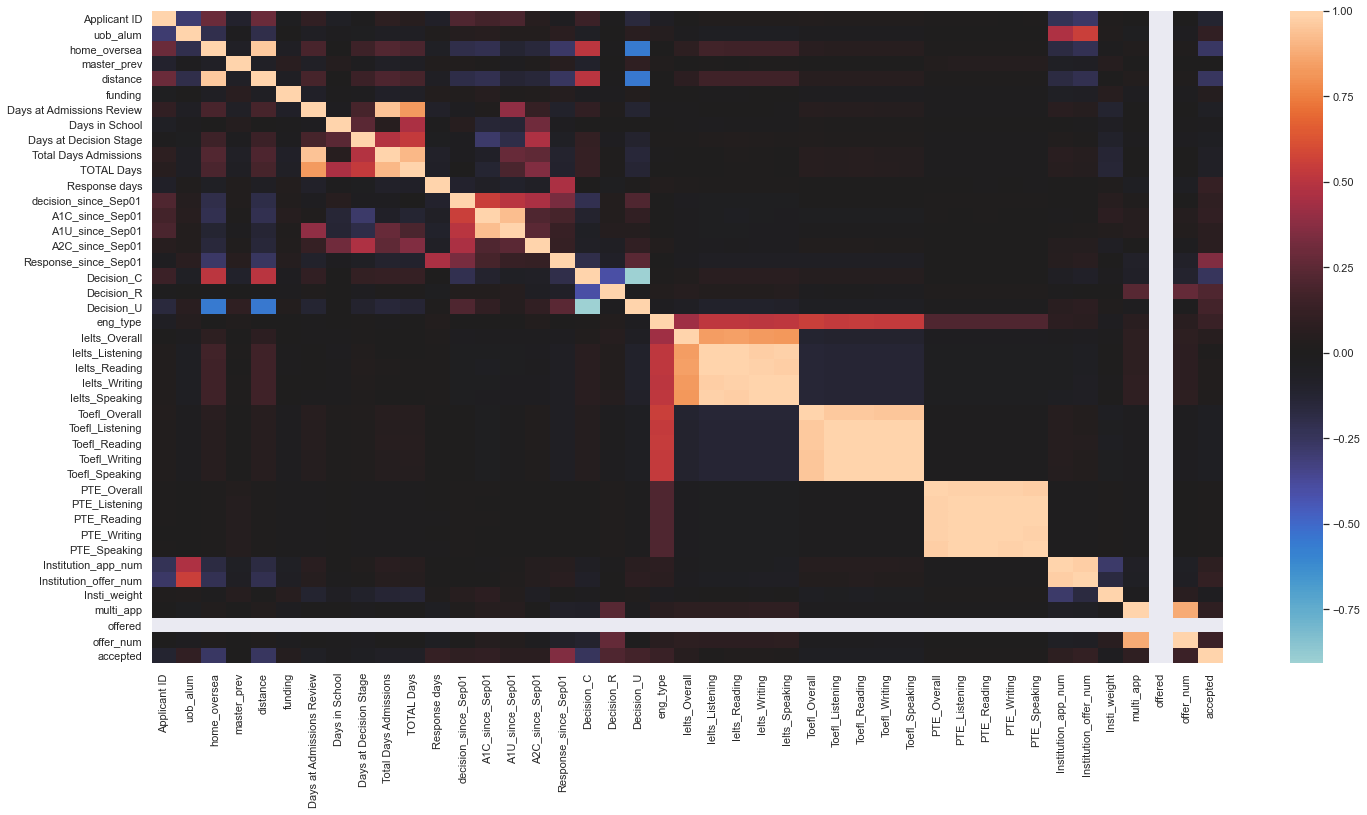

In [6]:
correlation = data.corr()
sns.set(rc = {'figure.figsize':(24,12)})
ax = sns.heatmap(correlation, center=0)
ax.figure.savefig("acc/correlation.png") 

## 2. Compare the turnover days distribution of accepted/no accepted

### 1) Acceptance Rate vs Total days 

In [7]:
turnover = data.loc[data['TOTAL Days'] < 200]
turnover = turnover.loc[:,['TOTAL Days','Applicant ID','accepted','Decision Date','A1 Created date',"Response days"]]
group_by_days= turnover.groupby('TOTAL Days', as_index=False)
days_count = group_by_days['Applicant ID'].count()

accept = turnover.loc[turnover['accepted']== 1]
group_by_days_accept= accept.groupby('TOTAL Days', as_index=False)
accept_count = group_by_days_accept['Applicant ID'].count()

days_count = days_count.merge(accept_count, how='left', on='TOTAL Days')
days_count = days_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
days_count['acceptance_rate'] = ''
days_count.eval('acceptance_rate = accept_count / total_count', inplace=True)
days_count = days_count.fillna(0)
days_count

,TOTAL Days,total_count,accept_count,acceptance_rate
0,0.0,531,78.0,0.146893
1,1.0,53,11.0,0.207547
2,2.0,24,7.0,0.291667
3,3.0,28,8.0,0.285714
4,4.0,46,11.0,0.239130
...,...,...,...,...
191,194.0,1,0.0,0.000000
192,195.0,2,1.0,0.500000
193,196.0,1,1.0,1.000000
194,197.0,1,0.0,0.000000


The accept rate verse totay days

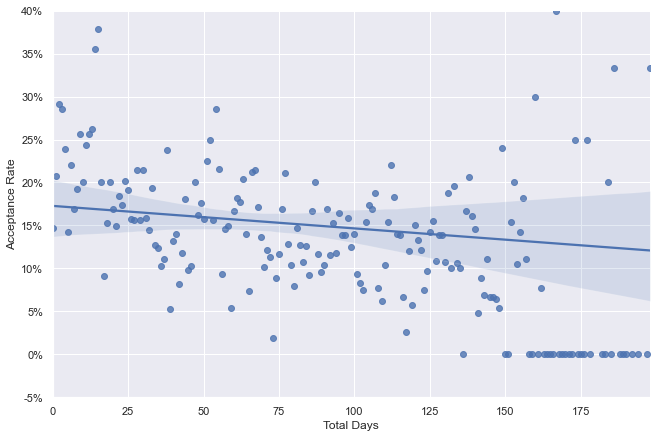

In [9]:
ax = sns.lmplot(data=days_count, x="TOTAL Days", y="acceptance_rate", height=6, aspect=1.5).set(ylim=(-0.05, 0.4))
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
ax.set(xlabel='Total Days', ylabel='Acceptance Rate')
ax.savefig('acc/total_days_lmplot.png')
#if the python version was different, the save might need to change into below
#ax.figure.savefig('acc/total_days_lmplot.png') 

The accept/reject distribution on totay days

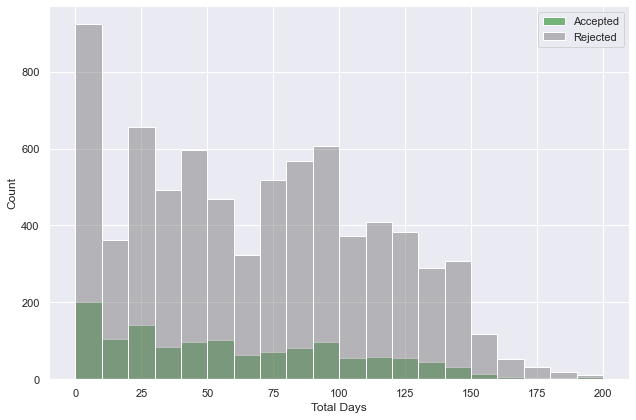

In [10]:
colors = {0: 'grey', 1: 'green'}
#sns.color_palette("husl")

ax = sns.displot(turnover, x="TOTAL Days", hue="accepted", palette=colors, binwidth=10, height=6, aspect=1.5, legend=False)
plt.legend(labels=["Accepted","Rejected"])
ax.set(xlabel='Total Days')
ax.savefig("acc/total_days_histo.png") 
#if the python version was different, the save might need to change into below
#ax.figure.savefig("acc/total_days_histo.png") 

### Conclusion: The shorter the admission review takes, the higher the acceptance rate

### 2)The accept/reject distribution on the start date and decision date of the application

Distribution of accept/Rejected Applicant Numbers over Student Application Start Date

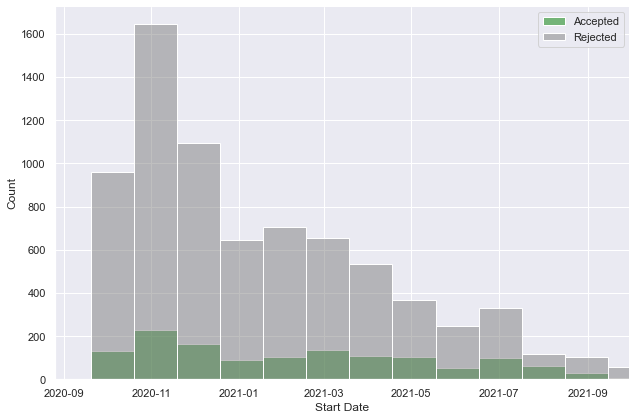

In [12]:
ax = sns.displot(turnover, x='A1 Created date', hue="accepted", binwidth=30, palette=colors, height = 6, aspect = 1.5, legend=False).set(xlim=(18500, 18900))
plt.legend(labels=["Accepted","Rejected"])
ax.set(xlabel='Start Date')
ax.savefig("acc/start_date_histo.png") 
#if the python version was different, the save might need to change into below
#ax.figure.savefig("acc/start_date_histo.png") 

Distribution of accept/Rejected Applicant Numbers over Student Application Decision Date

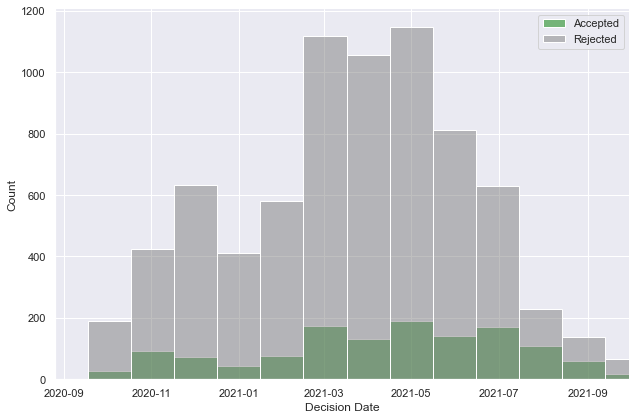

In [13]:
ax = sns.displot(turnover, x='Decision Date', hue="accepted", binwidth=30, palette=colors, height = 6, aspect = 1.5, legend=False).set(xlim=(18500, 18900))
plt.legend(labels=["Accepted","Rejected"])
ax.savefig("acc/decision_date_histo.png") 
#if the python version was different, the save might need to change into below
#ax.figure.savefig("acc/decision_date_histo.png") 

### Conclusion: Later applicants are more likely to accept

## 3. Home Student Distance
Assumption: for the oversea student the distance between home and birmingham won't be a factor because they already consider it before applying. Therefore we only look at the distance to birmingham for the home student 

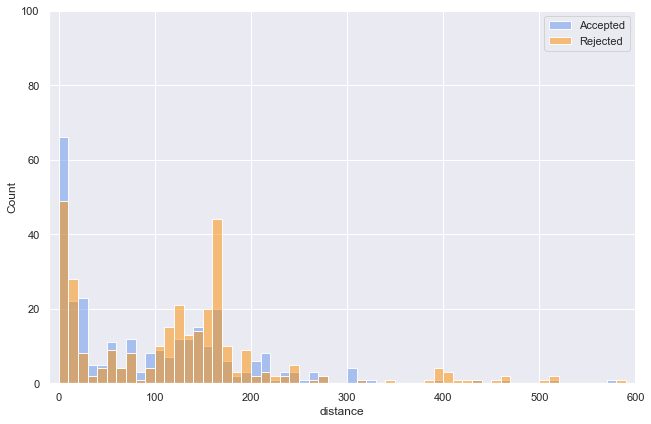

In [14]:
colors = {0: 'darkorange', 1: 'cornflowerblue'} 
home = data.loc[(data['distance'] < 600)]
ax = sns.displot(home, x='distance', hue="accepted", binwidth=10, palette=colors, height = 6, aspect = 1.5, legend=False).set(xlim=(-10, 600), ylim=(0,100))
plt.legend(labels=["Accepted","Rejected"])
ax.savefig('acc/home_distance.png')
#if the python version was different, the save might need to change into below
#ax.figure.savefig('acc/home_distance.png')

### Conclusion: Those applicants whose lives within 100 km of birmingham are more likely to accept

<font color='red'>The following code are no longer use</font>\
ax = sns.displot(turnover, x="TOTAL Days", hue="accepted", kind="kde", bw_adjust=.30, palette=colors)
plt.legend(labels=["Accepted","Rejected"])

fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 8)
ax1.set(xlim=(-10, 200))
sns.kdeplot(x_accepted_days, ax=ax1, color='green', bw_adjust=.30)
sns.kdeplot(x_rejected_days, ax=ax1, color='grey', bw_adjust=.30)
plt.legend(labels=["Accepted","Rejected"])

fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 8)

x_accepted_date = Accepted['Decision Date']
x_rejected_date = Rejected['Decision Date']
#ax1.set(xlim=(18500, 19100))
sns.kdeplot(x_accepted_date, ax=ax1, color='green', bw_adjust=.30)
sns.kdeplot(x_rejected_date, ax=ax1, color='grey', bw_adjust=.30)
plt.legend(labels=["Accepted","Rejected"])

fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 8)

x_accepted_start = Accepted['A1 Created date']
x_rejected_start= Rejected['A1 Created date']
ax1.set(xlim=(18500, 18900))
sns.kdeplot(x_accepted_start, ax=ax1, color='green', bw_adjust=.50)
sns.kdeplot(x_rejected_start, ax=ax1, color='grey', bw_adjust=.50)
plt.legend(labels=["Accepted","Rejected"])

## 4. English distribution in different test
### 1) IELTS

In [15]:
ielts = data.loc[(data['Ielts_Overall'] > 3) & (data['Ielts_Overall'] < 9) ]
ielts = ielts.loc[:,['Ielts_Overall','Applicant ID','accepted']]
group_by_ielts = ielts.groupby('Ielts_Overall', as_index=False)
ielts_count = group_by_ielts['Applicant ID'].count()

accept = ielts.loc[ielts['accepted']== 1]
group_by_ielts_accept= accept.groupby('Ielts_Overall', as_index=False)
accept_count = group_by_ielts_accept['Applicant ID'].count()

ielts_count = ielts_count.merge(accept_count, how='left', on='Ielts_Overall')
ielts_count = ielts_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
ielts_count['acceptance_rate'] = ''
ielts_count.eval('acceptance_rate = accept_count / total_count', inplace=True)
ielts_count = ielts_count.fillna(0)
ielts_count

,Ielts_Overall,total_count,accept_count,acceptance_rate
0,4.5,5,1,0.200000
1,5.0,24,8,0.333333
2,5.5,158,80,0.506329
3,6.0,605,149,0.246281
4,6.5,709,90,0.126939
5,7.0,606,48,0.079208
6,7.5,354,37,0.104520
7,8.0,208,26,0.125000
8,8.5,26,4,0.153846


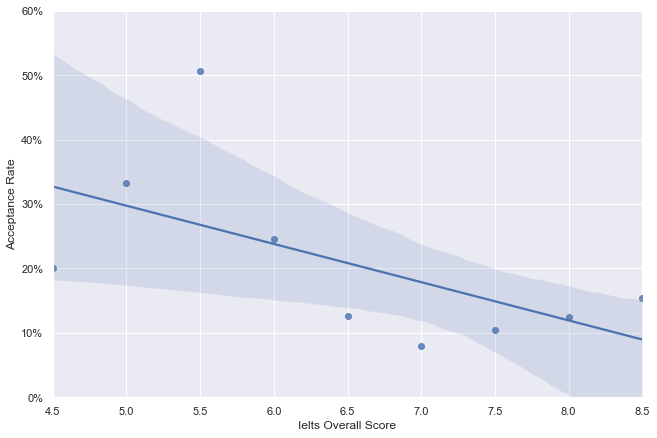

In [17]:
ax1 = sns.lmplot(data = ielts_count, x="Ielts_Overall", y="acceptance_rate", height=6, aspect=1.5).set(ylim=(0, 0.6))
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
ax1.set(xlabel='Ielts Overall Score', ylabel='Acceptance Rate')
ax1.savefig('acc/ielts_lmplot.png')
#if the python version was different, the save might need to change into below
#ax1.figure.savefig('acc/ielts_lmplot.png')

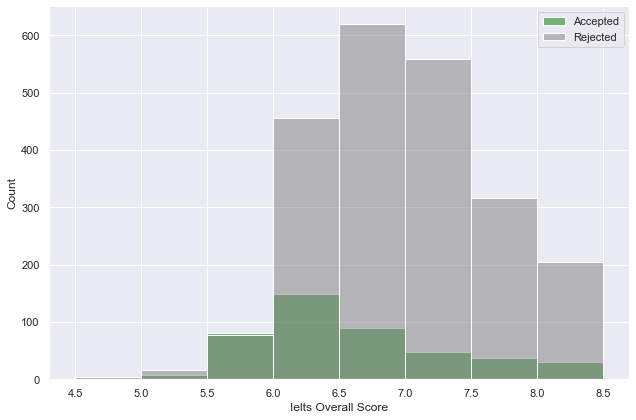

In [18]:
colors = {0: 'grey', 1: 'green'}
ax2 = sns.displot(ielts, x="Ielts_Overall", hue="accepted", binwidth=0.5, palette=colors, height=6, aspect=1.5, legend=False)
plt.legend(labels=["Accepted","Rejected"])
ax2.set(xlabel='Ielts Overall Score')
ax2.savefig('acc/ielts_histo.png')
#if the python version was different, the save might need to change into below
#ax2.figure.savefig('acc/ielts_histo.png')

### 2)TOEFL

In [19]:
toefl = data.loc[(data['Toefl_Overall'] > 75) & (data['Toefl_Overall'] < 121) ]
toefl = toefl.loc[:,['Toefl_Overall','Applicant ID','accepted']]
group_by_toefl = toefl.groupby('Toefl_Overall', as_index=False)
toefl_count = group_by_toefl['Applicant ID'].count()

accept = toefl.loc[toefl['accepted']== 1]
group_by_toefl_accept= accept.groupby('Toefl_Overall', as_index=False)
accept_count = group_by_toefl_accept['Applicant ID'].count()

toefl_count = toefl_count.merge(accept_count, how='left', on='Toefl_Overall')
toefl_count = toefl_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
toefl_count['acceptance_rate'] = ''
toefl_count.eval('acceptance_rate = accept_count / total_count', inplace=True)
toefl_count = toefl_count.fillna(0)

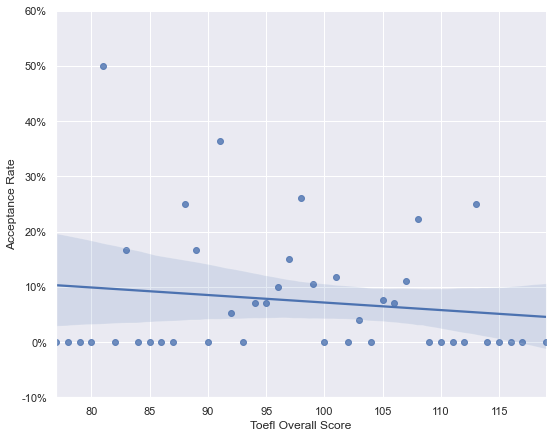

In [21]:
ax3 = sns.lmplot(data = toefl_count, x="Toefl_Overall", y="acceptance_rate", height=6, aspect=1.25).set(ylim=(-0.01, 0.6))
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
ax3.set(xlabel='Toefl Overall Score', ylabel='Acceptance Rate')
ax3.savefig('acc/toefl_lmplot.png')
#if the python version was different, the save might need to change into below
#ax3.figure.savefig('acc/toefl_lmplot.png')

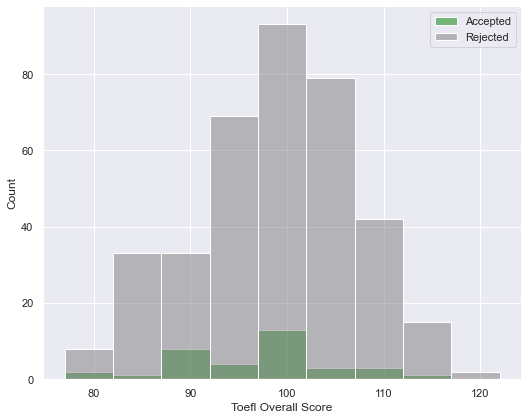

In [22]:
colors = {0: 'grey', 1: 'green'}
ax4 = sns.displot(toefl, x="Toefl_Overall", hue="accepted", binwidth=5, palette=colors, height=6, aspect=1.25, legend=False)
plt.legend(labels=["Accepted","Rejected"])
ax4.set(xlabel='Toefl Overall Score')
ax4.savefig('acc/toefl_histo.png')
#if the python version was different, the save might need to change into below
#ax4.figure.savefig('acc/toefl_histo.png')

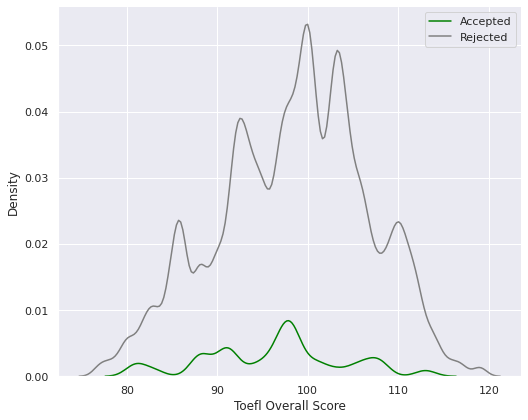

In [19]:
# try to see if a curve graph is better than histogram
colors = {0: 'grey', 1: 'green'}
ax4 = sns.displot(toefl, x="Toefl_Overall", hue="accepted", kind="kde", bw_adjust=.30 , palette=colors, height=6, aspect=1.25, legend=False)
plt.legend(labels=["Accepted","Rejected"])
ax4.set(xlabel='Toefl Overall Score')


fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 8)

sns.histplot(toefl, x="Toefl_Overall", hue="accepted", ax=ax1, binwidth=5, palette=colors, legend=False)
sns.kdeplot(toefl, x="Toefl_Overall", hue="accepted", ax=ax1, bw_adjust=.30 , palette=colors, legend=False)

plt.legend(labels=["Accepted","Rejected"])
ax1.set(xlabel='Toefl Overall Score')

### PTE: We can see there are very few data point, making the plot meaningless

In [20]:
pte = data.loc[(data['PTE_Overall'] > 50) & (data['PTE_Overall'] < 90) ]
pte = pte.loc[:,['PTE_Overall','Applicant ID','accepted']]
group_by_pte = pte.groupby('PTE_Overall', as_index=False)
pte_count = group_by_pte['Applicant ID'].count()

accept = pte.loc[pte['accepted']==1]
group_by_pte_accept= accept.groupby('PTE_Overall', as_index=False)
accept_count = group_by_pte_accept['Applicant ID'].count()

pte_count = pte_count.merge(accept_count, how='left', on='PTE_Overall')
pte_count = pte_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
pte_count['acceptance_rate'] = ''
pte_count.eval('acceptance_rate = accept_count / total_count', inplace=True)
pte_count = pte_count.fillna(0)
pte_count

,PTE_Overall,total_count,accept_count,acceptance_rate
0,55.0,1,0.0,0.000000
1,56.0,1,0.0,0.000000
2,58.0,1,0.0,0.000000
3,60.0,2,1.0,0.500000
4,61.0,1,0.0,0.000000
5,63.0,1,0.0,0.000000
6,66.0,6,2.0,0.333333
7,68.0,1,0.0,0.000000
8,69.0,1,0.0,0.000000
9,71.0,3,0.0,0.000000


### Conclusion: The higher the English score, the lower the acceptance rate 

<font color='red'>The following code are no longer use</font>\
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 8)

x_accepted_eng = Accepted['Ielts_Overall'].loc[Accepted['Ielts_Overall'] > 0]
x_rejected_eng = Rejected['Ielts_Overall'].loc[Rejected['Ielts_Overall'] > 0]
ax1.set(xlim=(4, 9))
sns.kdeplot(x_accepted_eng, ax=ax1, color='green',bw_adjust=.20)
sns.kdeplot(x_rejected_eng, ax=ax1, color='grey',bw_adjust=.20)
plt.legend(labels=["Accepted","Rejected"])

fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 8)

x_accepted_eng = Accepted['Toefl_Overall'].loc[Accepted['Toefl_Overall'] > 0]
x_rejected_eng = Rejected['Toefl_Overall'].loc[Rejected['Toefl_Overall'] > 0]
ax1.set(xlim=(80, 120))
sns.kdeplot(x_accepted_eng, ax=ax1, color='green',bw_adjust=.30)
sns.kdeplot(x_rejected_eng, ax=ax1, color='grey',bw_adjust=.30)
plt.legend(labels=["Accepted","Rejected"])

fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 8)

x_accepted_eng = Accepted['PTE_Overall'].loc[Accepted['PTE_Overall'] > 0]
x_rejected_eng = Rejected['PTE_Overall'].loc[Rejected['PTE_Overall'] > 0]
ax1.set(xlim=(30, 110))
sns.kdeplot(x_accepted_eng, ax=ax1, color='green',bw_adjust=.20)
sns.kdeplot(x_rejected_eng, ax=ax1, color='grey',bw_adjust=.20)
plt.legend(labels=["Accepted","Rejected"])

## 5. Acceptance Rate by School

In [23]:
dep = data.loc[:,['School','Applicant ID','accepted']]
group_by_dep = dep.groupby('School', as_index=False)
dep_count = group_by_dep['Applicant ID'].count()

accept = dep.loc[dep['accepted']== 1]
group_by_dep_accept= accept.groupby('School', as_index=False)
accept_count = group_by_dep_accept['Applicant ID'].count()

dep_count = dep_count.merge(accept_count, how='left', on='School')
dep_count = dep_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
dep_count['acceptance_rate'] = ''
dep_count.eval('acceptance_rate = accept_count / total_count', inplace=True)
dep_count = dep_count.fillna(0)
dep_count = dep_count.sort_values(by=['acceptance_rate'])
dep_count.to_csv('acc/dep_count.csv')
dep_count

,School,total_count,accept_count,acceptance_rate
4,EPS College Hub,213,0.0,0.000000
11,Wiley,56,0.0,0.000000
0,Business School,980,11.0,0.011224
8,Metallurgy and Materials,382,51.0,0.133508
1,Chemical Engineering,801,107.0,0.133583
7,Mechanical Engineering,373,53.0,0.142091
3,Computer Science,3104,514.0,0.165593
5,Elec Elec and System Eng;Elec Elec and Sys Eng...,939,163.0,0.173589
10,School of Engineering;Elec Elec and Sys Engine...,417,76.0,0.182254
2,Civil Engineering,968,191.0,0.197314


ax = sns.barplot(x="School", y="acceptance_rate", data=dep_count)

## 6. Other features

In [24]:
accept = data.loc[data['accepted'] == 1]
#reject = data.loc[ielts['accepted']== 0]

group_by_multi_app = data.groupby(['multi_app'])
multi_app_count = group_by_multi_app['Applicant ID'].count().to_frame()
group_by_multi_app_accept = accept.groupby(['multi_app'])
multi_app_count_accept = group_by_multi_app_accept['Applicant ID'].count().to_frame()
multi_app_count = multi_app_count.merge(multi_app_count_accept, how='left', on='multi_app')
multi_app_count = multi_app_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
multi_app_count['acceptance_rate'] = ''
multi_app_count = multi_app_count.fillna(0)
multi_app_count.eval('acceptance_rate = accept_count / total_count', inplace=True)

multi_app_count.to_csv('acc/multi_app.csv')
multi_app_count

,total_count,accept_count,acceptance_rate
multi_app,,,
1,7816,1065.0,0.136259
2,917,210.0,0.229008
3,146,48.0,0.328767
4,21,0.0,0.000000
5,12,5.0,0.416667


In [25]:
group_by_multi_offer = data.groupby(['offer_num'])
multi_offer_count = group_by_multi_offer['Applicant ID'].count().to_frame()
group_by_multi_offer_accept = accept.groupby(['offer_num'])
multi_offer_count_accept = group_by_multi_offer_accept['Applicant ID'].count().to_frame()
multi_offer_count = multi_offer_count.merge(multi_offer_count_accept, how='left', on='offer_num')
multi_offer_count = multi_offer_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
multi_offer_count['acceptance_rate'] = ''
multi_offer_count = multi_offer_count.fillna(0)
multi_offer_count.eval('acceptance_rate = accept_count / total_count', inplace=True)

multi_offer_count.to_csv('acc/multi_offer.csv')
multi_offer_count

,total_count,accept_count,acceptance_rate
offer_num,,,
1.0,8036,1065.0,0.132529
2.0,756,210.0,0.277778
3.0,102,48.0,0.470588
4.0,8,0.0,0.000000
5.0,10,5.0,0.500000


In [26]:
group_by_funding = data.groupby(['funding'])
funding_count = group_by_funding['Applicant ID'].count().to_frame()
group_by_funding_accept = accept.groupby(['funding'])
funding_count_accept = group_by_funding_accept['Applicant ID'].count().to_frame()
funding_count = funding_count.merge(funding_count_accept, how='left', on='funding')
funding_count = funding_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
funding_count['acceptance_rate'] = ''
funding_count = funding_count.fillna(0)
funding_count.eval('acceptance_rate = accept_count / total_count', inplace=True)

funding_count.to_csv('acc/funding.csv')
funding_count

,total_count,accept_count,acceptance_rate
funding,,,
0.0,8616,1258,0.146007
1.0,296,70,0.236486


In [27]:
group_by_alum = data.groupby(['uob_alum'])
alum_count = group_by_alum['Applicant ID'].count().to_frame()
group_by_alum_accept = accept.groupby(['uob_alum'])
alum_count_accept = group_by_alum_accept['Applicant ID'].count().to_frame()
alum_count = alum_count.merge(alum_count_accept, how='left', on='uob_alum')
alum_count = alum_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
alum_count['acceptance_rate'] = ''
alum_count = alum_count.fillna(0)
alum_count.eval('acceptance_rate = accept_count / total_count', inplace=True)

alum_count.to_csv('acc/alum_count.csv')
alum_count

,total_count,accept_count,acceptance_rate
uob_alum,,,
0,8822,1282,0.145319
1,90,46,0.511111


In [28]:
group_by_home = data.groupby(['home_oversea'])
home_count = group_by_home['Applicant ID'].count().to_frame()
group_by_home_accept = accept.groupby(['home_oversea'])
home_count_accept = group_by_home_accept['Applicant ID'].count().to_frame()
home_count = home_count.merge(home_count_accept, how='left', on='home_oversea')
home_count = home_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
home_count['acceptance_rate'] = ''
home_count = home_count.fillna(0)
home_count.eval('acceptance_rate = accept_count / total_count', inplace=True)

home_count.to_csv('acc/home_count.csv')
home_count

,total_count,accept_count,acceptance_rate
home_oversea,,,
0,674,320,0.474777
1,8238,1008,0.122360


In [29]:
group_by_master = data.groupby(['master_prev'])
master_count = group_by_master['Applicant ID'].count().to_frame()
group_by_master_accept = accept.groupby(['master_prev'])
master_count_accept = group_by_master_accept['Applicant ID'].count().to_frame()
master_count = master_count.merge(master_count_accept, how='left', on='master_prev')
master_count = master_count.rename(columns={"Applicant ID_y": "accept_count", "Applicant ID_x": "total_count"})
master_count['acceptance_rate'] = ''
master_count = master_count.fillna(0)
master_count.eval('acceptance_rate = accept_count / total_count', inplace=True)

master_count.to_csv('acc/master_count.csv')
master_count

,total_count,accept_count,acceptance_rate
master_prev,,,
0,8397,1247,0.148505
1,515,81,0.157282


group_by_country = data.groupby(['Nationality','accepted'])
country_count = group_by_country['Applicant ID'].count()
country_count